# HW 7
## CS156, Kai Chang

### Question 1
Answer Choice: **D**, $k = 6$ <br>
Reasoning: see code. Finally figured out how to get numpy to load dataset, so rewrote transform using power of numpy hstack.

In [122]:
def transform(x_, phi_i):
    '''
    Returns transformed data used for regression.
    
    Parameters
    ----------
    x_    : two-dimensional input [x1, x2], numpy array
    phi_i : indices representing which non-linear transformation we are applying
    
    Returns
    -------
    phi_ : (1, x1, x2, x1^2, x2^2, x1x2, |x1 - x2|, |x1 + x2|), numpy array
    '''
    # add 1s
    n = x_.shape[0]
    phi_ = np.ones((n,1))
    phi_ = np.hstack((phi_, x_))

    # np.hstack((a, np.reshape(a[:,1]**2,(n,1))))    
    if phi_i >= 3:
        phi_ = np.hstack((phi_, np.reshape(x_[:,0]**2, (n,1))))
    if phi_i >= 4:
        phi_ = np.hstack((phi_, np.reshape(x_[:,1]**2, (n,1))))
    if phi_i >= 5:
        phi_ = np.hstack((phi_, np.reshape(x_[:,0]*x_[:,1], (n,1))))
    if phi_i >= 6:
        phi_ = np.hstack((phi_, np.reshape(np.abs(x_[:,0]-x_[:,1]), (n,1))))
    if phi_i >= 7:
        phi_ = np.hstack((phi_, np.reshape(np.abs(x_[:,0]+ x_[:,1]), (n,1))))

    return phi_

In [123]:
def calc_suedo(x_train):
    return np.dot( np.linalg.inv( np.dot( x_train.T, x_train) ), x_train.T)

def lin_reg(x_pseudo, y):
    return np.dot(x_pseudo, y)

In [124]:
def calc_error(w, x_, y_):
    '''
    Calculates the E_out (error of out sample)
    
    Parameters
    ----------
    w  : weights learned from linear regression, numpy array
    x_ : dataset, multi-dimensional numpy array
    y_ : output (solution), numpy array
    
    Returns
    -------
    E_out
    '''
    N = 0
    
    for i in xrange(x_.shape[0]):
        N += max(0, np.sign(-np.dot(w.T, x_[i])*y_[i]))
    
    return N/float(x_.shape[0])

In [125]:
import numpy as np

data = np.loadtxt('in.dta')

# train = first 25, validate = last 10
train_set = data[0:25]
valid_set = data[25:]

In [127]:
# train and get weights
# note print valid_set[:, [0,1]] gives just columns
for k in [3,4,5,6,7]:
    phi_train = transform(train_set[:, [0,1]], k)
    phi_suedo = calc_suedo(phi_train)
    phi_w = lin_reg(phi_suedo, train_set[:,2])
    
    phi_valid = transform(valid_set[:,[0,1]], k)
    err_valid = calc_error(phi_w, phi_valid, valid_set[:,2])

    print 'Validation classification error for k = %i: '%k , err_valid 

Validation classification error for k = 3:  0.3
Validation classification error for k = 4:  0.5
Validation classification error for k = 5:  0.2
Validation classification error for k = 6:  0.0
Validation classification error for k = 7:  0.1


### Question 2
Answer Choice: **E**, $k=7$<br>
Reasoning: see code.

In [128]:
test_set = np.loadtxt('out.dta')

for k in [3,4,5,6,7]:
    phi_train = transform(train_set[:, [0,1]], k)
    phi_suedo = calc_suedo(phi_train)
    phi_w = lin_reg(phi_suedo, train_set[:,2])
    
    phi_test = transform(test_set[:,[0,1]], k)
    err_test = calc_error(phi_w, phi_test, test_set[:,2])

    print 'Test classification error for k = %i: '%k , err_test

Test classification error for k = 3:  0.42
Test classification error for k = 4:  0.416
Test classification error for k = 5:  0.188
Test classification error for k = 6:  0.084
Test classification error for k = 7:  0.072


### Question 3
Answer Choice: **D**, $k=6$<br>
Reasoning: see code.

In [129]:
data = np.loadtxt('in.dta')

# train = last 10, validate = first 25
train_set = data[25:]
valid_set = data[0:25]

for k in [3,4,5,6,7]:
    phi_train = transform(train_set[:, [0,1]], k)
    phi_suedo = calc_suedo(phi_train)
    phi_w = lin_reg(phi_suedo, train_set[:,2])
    
    phi_valid = transform(valid_set[:,[0,1]], k)
    err_valid = calc_error(phi_w, phi_valid, valid_set[:,2])

    print 'Validation classification error for k = %i: '%k , err_valid 

Validation classification error for k = 3:  0.28
Validation classification error for k = 4:  0.36
Validation classification error for k = 5:  0.2
Validation classification error for k = 6:  0.08
Validation classification error for k = 7:  0.12


### Question 4
Answer Choice: **D**, $k=6$<br>
Reasoning: see code.

In [130]:
test_set = np.loadtxt('out.dta')

for k in [3,4,5,6,7]:
    phi_train = transform(train_set[:, [0,1]], k)
    phi_suedo = calc_suedo(phi_train)
    phi_w = lin_reg(phi_suedo, train_set[:,2])
    
    phi_test = transform(test_set[:,[0,1]], k)
    err_test = calc_error(phi_w, phi_test, test_set[:,2])

    print 'Test classification error for k = %i: '%k , err_test

Test classification error for k = 3:  0.396
Test classification error for k = 4:  0.388
Test classification error for k = 5:  0.284
Test classification error for k = 6:  0.192
Test classification error for k = 7:  0.196


### Question 5
Answer Choice: **B**, 0.1, 0.2<br>
Reasoning: see code from above. We note we choose the same K for the out of sample error (test error) as the K that yields the smallest in sample error (validation error). For both cases, we have $k=6$, and the test (out of sample) classification error for $k = 6$ in the 25:10 is 0.084, and for $k = 6$ in the 10:25 case is 0.192.

### Question 6
Answer Choice: **D**, 0.5, 0.5, 0.4<br>
Reasoning: We ran the code below ~10,00 times. It chose 2 lists of 10,000 values from [0,1] (independently for each value in list and between lists), and calculated the minimum between the two as a third list. Then we took the average of the three lists.

Note from python:

In [70]:
import random 

# int
random.randint(0, 1)  # 0 or 1(both incl.)

# float excl. 1.0
random.random()  # float from [0,1)

# from [0.0, 1.0], but upper boundary not guaranteed
random.uniform(0, 1)  

In [85]:
e1 = [random.uniform(0, 1) for x in xrange(10000)]
e2 = [random.uniform(0, 1) for x in xrange(10000)]
e3 = [min(i,j) for i, j in zip(e1, e2)]

print 'e1: ' , sum(e1)/len(e1), '\ne2: ', sum(e2)/len(e2), '\ne3: ', sum(e3)/len(e3)

e1:  0.505344290326 
e2:  0.503548252053 
e3:  0.337599998015


### Question 7
Answer Choice: **C**, $\sqrt{9+4\sqrt{6}}$<br>
Reasoning: see scratch work. The general gist is to look at all possible validation combinations (ie. how many combinations can we do with removing a single point in our data, and in our case because we have 3 points, we have $3 C 2$ which yields 3), calculate what our coefficients for our hypotheses would be, and calculate the sum of our validation error and what $\rho$ would be in order for the two hypothesis to generate the same validation error. This is the definition of cross validation (ie. sum the errors for the single points we removed to use as validation point across all possible combinations, NOT permuation). From there, we found what $\rho$ would be in order for the two models to be tied (ie. output same cross validation error). Only *C* had the exact numbers and same expression.


Important asides:

+ We do not need to include the $\frac{1}{3}$ in the error calculation (ie. $\frac{1}{N}\sum E_i$) because we are comparing the equivalence of the two hypothesis errors on the same dataset (validation set), so in our case, N would be identical for the $h_0 = b$ and $h_1 = ax+b$. 
+ We are doing squared error, so we do $\sum (y_{\text{validation point}} - h_{i_{\text{validation point}}})^2$.
+ We analytically solved the hypothesis coefficients and the sum of the cross validation error. The value of $rho$ such that the two models would be tied was solved by Mathematica by this formula: Solve[1/2 == 4/(p - 1)^2 + 4/(p + 1)^2, p]
+ This yielded 4 results (2 inherent times $\rho$ was squared), $\left\{\left\{p\to -i \sqrt{4 \sqrt{6}-9}\right\},\left\{p\to i \sqrt{4 \sqrt{6}-9}\right\},\left\{p\to -\sqrt{4 \sqrt{6}+9}\right\},\left\{p\to \sqrt{4 \sqrt{6}+9}\right\}\right\}$, which looking at the answer choices, only one choice was valid / contained the right series of values.

### Question 8
Answer Choice: **C**, 60%<br>
Reasoning: see code. We know that the SVM formula we got is a linear hard-margin SVM. So, taking our PLA code from homework 1 and writing our SVM code using scikit-learn svm.svc, we found the E of each respective method by finding the percent that $f(x) \neq g(x)$ using a large enough dataset such that it approximates the true error. Then we compared the two and checked to see how many times for the runs $E_{svm}$ was lower, and divided that by the 1000 runs we simulated.

Note a couple of asides:
+ using small dataset to test error yields ~0.3 and 0.4, which suggests approximation not plateauing yet
+ using w_n_ (norm weight) instead of w_ yields ~0.8 and 0.9, which suggests norm weights are NOT correct choice in calculating PLA, which is clear after looking at PLA formula and process. It was a mistake from previous homework.
+ 1000 data points, percentage improvement over PLA:  0.594
+ 5000 data points, percentage improvement over PLA:  0.615
+ 15000 data points, percentage improvement over PLA:  0.591
+ Thus we note we being the fluctuation around this range (this is where our PLA maxes out solution, as any change will just have it fluctuate around the optimal PLA solution).

In [281]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
%matplotlib inline

def gen_line():
    '''
    Generate boundary line for classification
    
    Returns
    -------
    2 2-dimensional array consisting of your line in form [w0, w1, w2] and [w0, w1_norm, w2_norm]
    
    '''
    [x1,x2,y1,y2] = [rnd.uniform(-1.0, 1.0), rnd.uniform(-1.0, 1.0), rnd.uniform(-1.0, 1.0), rnd.uniform(-1.0, 1.0)]
    xA,yA,xB,yB = [rnd.uniform(-1, 1) for i in range(4)]
    w = np.array([x2*y1-y2*x1, y2-y1, x1-x2])
    w_norm = np.array([1, -w[1]/w[2], -w[0]/w[2]])
    return w, w_norm

In [282]:
def gen_pts(n, d, w=None, w_norm=None):
    '''
    Generates random points from a uniform distribution over -1,1
    
    Parameters
    ----------
    n : number of points
    d : dimension of image
    
    Returns
    -------
    d-dimensional array consisting of n-number of uniform, random points, and a clean slate sign
    '''
    if w is None:
        w, w_norm = gen_line()
    
    y = [1] # jank way
    
    while len(set(y)) <= 1:
        d_ = np.random.uniform(-1.0, 1.0,(d,n))
        x_ = np.append(np.ones(n), d_).reshape((d+1,n))
        y = np.sign(np.dot(w.T,x_))
        d_ = np.append(x_, y).reshape((d+2,n))
        
    return x_, y, w, d_, w_norm

In [283]:
def pick_pt(y_, y):
    '''
    Find misclassified points and pick one at random.
    
    Parameters
    ----------
    y_ : list of all output points from our updated weight
    y  : list of correct output points
    
    Returns
    -------
    index of random point, number of misclassified points
    '''
    mc_pts = []
    for i in xrange(len(y)):
        if y_[i] != y[i]:
            mc_pts.append(i)
    
    try:
        index = rnd.choice(mc_pts)
    except IndexError:
        index = 0
    
    return index, len(mc_pts)
    

def update(xi, yi_, w_):
    '''
    Takes a misclassified point and updates the weight to correctly classify point
    
    Parameters
    ----------
    xi   : incorrectly classified point
    yi_  : correct sign for point
    w_   : current weight

    Returns
    -------
    updated weight
    '''
    w_ += yi_ * xi

    return w_

In [284]:
def pre_process(n, d):
    '''
    Creates the necessary datasets and solutions needed to run a PLA classification
    
    Parameters
    ----------
    n : number of data points
    d : dimensions of dataset
    
    Returns
    -------
    x_  : coordinates or feature information (1, x1, x2)
    y   : solution from sign function
    w   : true weights (w0, w1, w2)
    d_  : entire dataset (incl. solution)
    w_n : normalized weights, ie. (w0=1, w1, w2)
    '''
    x_, y, w, d_, w_n = gen_pts(n,d)
    
    return x_, y, w, d_, w_n

In [285]:
def pla(x_, y):
    w_ = np.zeros(3)
    y_ = np.sign(np.dot(w_.T,x_))

    while np.array_equal(y, y_) != True:
        index, total_mc_pts= pick_pt(y_,y)
        w_ = update(x_[:,index], y[index], w_)
        y_ = np.sign(np.dot(w_.T, x_))

    w_n = np.array([1, -w_[1]/w_[2], -w_[0]/w_[2]])

    return i, w_n, w_

In [302]:
from sklearn import svm

pla_disagreement = []
svm_disagreement = []
n = 10
d = 2

for i in xrange(1000):
    x_, y, w, d_, w_n = pre_process(n, d)
    _, w_n_, w_ = pla(x_, y) # pla
    clf = svm.SVC(C=np.inf, kernel='linear') # svm
    clf.fit(x_[1:].T, y)
    
    x_, y, _, _, _ = gen_pts(10000, d, w, w_n) # 10000 test points, large enough sample for approximation
    y_ = np.sign(np.dot(w_.T,x_)) # pla, changed to w_ from w_n_
    zzz, nmc = pick_pt(y_, y)
    
    pla_disagreement.append(nmc)
    
    y_ = clf.predict(x_[1:].T) # svm
    zzz, nmc = pick_pt(y_, y)
    
    svm_disagreement.append(nmc)

diff = np.array(svm_disagreement) - np.array(pla_disagreement)

print 'percentage improvement over PLA: ', sum(1 for number in diff if number < 0)/float(len(diff))   

percentage improvement over PLA:  0.623


We decide to plot our last svc to see an overview of the classification + the support vectors for the test set = 1000 points case. The classification line / boundary is labeled, and the support weight vectors are marked with green large stars.

[ 3.54770472  7.14845261]
[[ 0.91095083 -0.84329616]
 [-0.91869194  0.06480113]
 [-0.60515091  0.18891039]]


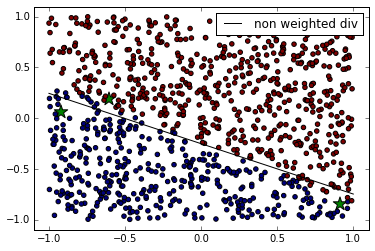

In [301]:
# weights of svm
w = clf.coef_[0]
print w

# support vectors
sv = clf.support_vectors_
print sv

a = -w[0] / w[1]

xx = np.linspace(-1,1)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

plt.scatter(sv[:,0], sv[:,1], marker='*', c='g', s=200)
plt.scatter(x_[1], x_[2], c = y)
plt.ylim([-1.1, 1.1])
plt.xlim([-1.1, 1.1])
plt.legend()
plt.show()

### Question 9
Answer Choice: **D**, 70% <br>
Reasoning: see code. Note a key aside:
+ Using 1000 test points, we get the same result as before (question 8) of ~0.594 improvement. 
+ Using 5000 test points, we get past the 0.6 improvement rating.
+ Using 10000 test points, which was within the range for the fluctuation or plateau (upper bound), we get a 0.666 diasgreement improvement.
+ Using 15000 test points, we get 0.648 improvement and is lower than the 10000 test point disagreement improvement, which is what we expected.
+ There is a need to hyperparametrize when the approximation reaches it's plateau, but in this case, we simply just adjust and compare change in disagreement.

In [305]:
pla_disagreement = []
svm_disagreement = []
sv = []
n = 100
d = 2

for i in xrange(1000):
    x_, y, w, d_, w_n = pre_process(n, d)
    _, w_n_, w_ = pla(x_, y) # pla
    clf = svm.SVC(C=np.inf, kernel='linear') # svm
    clf.fit(x_[1:].T, y)
    
    x_, y, _, _, _ = gen_pts(10000, d, w, w_n) # 10000 test points, large enough sample for approximation
    y_ = np.sign(np.dot(w_.T,x_)) # pla, changed to w_ from w_n_
    zzz, nmc = pick_pt(y_, y)
    
    pla_disagreement.append(nmc)
    
    y_ = clf.predict(x_[1:].T) # svm
    zzz, nmc = pick_pt(y_, y)
    
    svm_disagreement.append(nmc)
    
    # get support vector size
    sv.append(len(clf.support_vectors_))

diff = np.array(svm_disagreement) - np.array(pla_disagreement)

print 'percentage improvement over pla: ', sum(1 for number in diff if number < 0)/float(len(diff))   

percentage improvement over pla:  0.632


### Question 10
Answer Choice: **B**, 3<br>
Reasoning: see code.

In [306]:
print 'average support vectors: ', sum(sv)/float(len(sv))

average support vectors:  2.999
